In [96]:
from data_analysis import DataAnalysis
import os
import matplotlib.pyplot as plt
import nltk
import numpy as np

## 1. basic analysis

In [158]:
def read_data2(filename):
    """
    helper method to read the file line by line
    :param filename: the file to read data from - csv
    :return: the complete data in a list
    """
    complete_data = []
    # open the file with utf8 encoding, split it at the comma (it should be csv)
    with open(filename, encoding="utf8") as f:
        for lines in f:
            # the train file is separates by semicolons instead of commas
            line = lines.strip("\n").split(',')
            if "pap" in filename:
                temp_line=[]
                if line[1] == "implausible":
                    temp_line.append('0')
                else:
                    temp_line.append('1')
                temp_line.append(line[0])
                complete_data.append(temp_line)
            else:
                complete_data.append(line)

    return complete_data[1:]  # skip the header

class DataAnalysis2(DataAnalysis):
    def __init__(self, filenames_list):
        self.file_content = []
        for i in filenames_list:
            self.file_content+=read_data2(i)
        self.all_tokens = self.extract_word_tokens()
        self.word_dict = self.store_words()
        self.num_unique_tokens = self.unique_word_count()
        self.total_token_count = self.total_word_count()
        self.readability_scores = self.readability()
        self.pos_mapping = self.pos_tags()
        self.unique_pos = {}
        self.pos_counts = self.count_pos_bigrams()
        self.classes_num = self.class_count()
    
    def class_count(self):
        """
        Count the quantities for each category separately.
        :return: a set of class and its count
        """
        classes_num = {"0":0, "1":0}
        for i in self.file_content:
            classes_num [i[0]] += 1
        return classes_num
    
    def plot_pos(self):
        """
            helper method to plot the occurrences of pos-pairs occurring consecutively
            :return: plot the occurrences of pos-pairs occurring consecutively
        """
        # remove key-value pairs which occur less than 10 times for greater visibility
        #result = {key: self.pos_counts[key] for key in self.pos_counts.keys() if self.pos_counts[key] >= 10}
        temp_result = dict(sorted(self.pos_counts.items(), key=lambda item: item[1], reverse=True))
        first_ten_result= {key: temp_result[key] for key in list(temp_result)[:10]}
        # create a bar plot with labels and occurrence counts
        x = np.arange(len(first_ten_result.keys()))
        plt.plot(x, list(first_ten_result.values()))
        plt.xticks(x, list(first_ten_result.keys()), rotation=90)
        plt.xlabel("POS pairs")
        plt.ylabel("Count")
        plt.title("POS pairs and their counts")
        plt.tight_layout()
        return first_ten_result

  

In [159]:
def get_filepath(name,classnum_name,file_name):
    '''
    param name: name of the dataset, pep-3k or pap
    param classnum_name: for pap dataset, binary or multiclass
    param file_name: dev, test, train
    return: the str of apath of the file
    '''
    current_dir =os.path.realpath(".")
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir))
    filepath=os.path.abspath(os.path.join(parent_dir,name,'train-dev-test-split',classnum_name,file_name+'.csv'))
    return filepath

def get_dataset(*args):
    '''
    param arges: the str of file names
    return: the complete data in a list
    '''
    filenames_list=[]
    for i in args:
        print('get file from:',i)
        filenames_list.append(i)
    data_set=DataAnalysis2(filenames_list)
    return data_set


In [160]:
filepath1=get_filepath('pap','binary','train')
filepath2=get_filepath('pap','binary','dev')
filepath3=get_filepath('pap','binary','test')
filepath4=get_filepath('pep-3k','','train')
filepath5=get_filepath('pep-3k','','dev')
filepath6=get_filepath('pep-3k','','test')

In [161]:
data_set1=get_dataset(filepath1)
data_set2=get_dataset(filepath2)
data_set3=get_dataset(filepath3)
data_set4=get_dataset(filepath4)
data_set5=get_dataset(filepath5)
data_set6=get_dataset(filepath6)

get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/test.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/test.csv


In [162]:
data_set_com1=get_dataset(filepath1,filepath2,filepath3)
data_set_com2=get_dataset(filepath4,filepath5,filepath6)

get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/test.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/test.csv


In [163]:
print('pap:number of rows and columns, number of classes')
print('train:',data_set1.dataset_statistics(),data_set1.classes_num)
print('dev:',data_set2.dataset_statistics(), data_set2.classes_num)
print('test:',data_set3.dataset_statistics(), data_set3.classes_num)
print('total:',data_set_com1.dataset_statistics(), data_set_com1.classes_num)
print('pep_3k:number of rows and columns, number of classes')
print('train:',data_set4.dataset_statistics(), data_set4.classes_num)
print('dev:',data_set5.dataset_statistics(), data_set5.classes_num)
print('test:',data_set6.dataset_statistics(), data_set6.classes_num)
print('total:',data_set_com2.dataset_statistics(), data_set_com2.classes_num)

pap:number of rows and columns, number of classes
train: (1728, 2) {'0': 861, '1': 867}
dev: (216, 2) {'0': 110, '1': 106}
test: (216, 2) {'0': 109, '1': 107}
total: (2160, 2) {'0': 1080, '1': 1080}
pep_3k:number of rows and columns, number of classes
train: (2449, 2) {'0': 1227, '1': 1222}
dev: (306, 2) {'0': 153, '1': 153}
test: (307, 2) {'0': 154, '1': 153}
total: (3062, 2) {'0': 1534, '1': 1528}


In [164]:
print('pap:num_unique_tokens')
print('train:',data_set1.num_unique_tokens)
print('dev:',data_set2.num_unique_tokens)
print('test:',data_set3.num_unique_tokens)
print('total:',data_set_com1.num_unique_tokens)
print('pep_3k:num_unique_tokens')
print('train:',data_set4.num_unique_tokens)
print('dev:',data_set5.num_unique_tokens)
print('test:',data_set6.num_unique_tokens)
print('total:',data_set_com2.num_unique_tokens)

pap:num_unique_tokens
train: 2460
dev: 553
test: 544
total: 2749
pep_3k:num_unique_tokens
train: 561
dev: 330
test: 315
total: 584


In [165]:
print(len(data_set1.unique_pos)) #18
print(len(data_set2.unique_pos)) #12
print(len(data_set3.unique_pos)) #12
print(len(data_set4.unique_pos)) #17
print(len(data_set5.unique_pos)) #14
print(len(data_set6.unique_pos)) #12
print(len(data_set_com1.unique_pos))
print(len(data_set_com2.unique_pos))

18
12
12
17
14
12
18
18


None
None
None


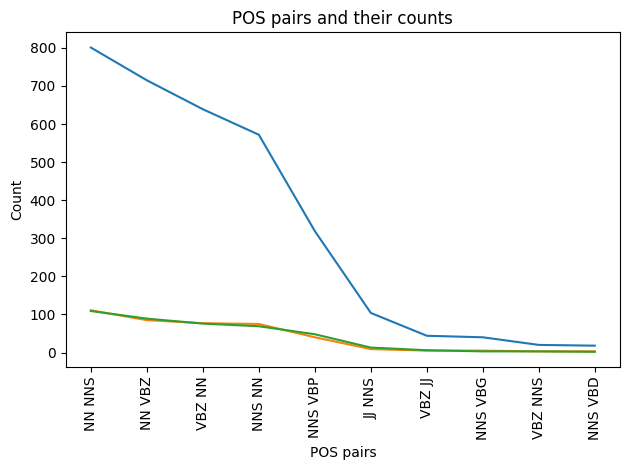

In [166]:
print(data_set1.plot_pos())
print(data_set2.plot_pos())
print(data_set3.plot_pos())


None
None
None


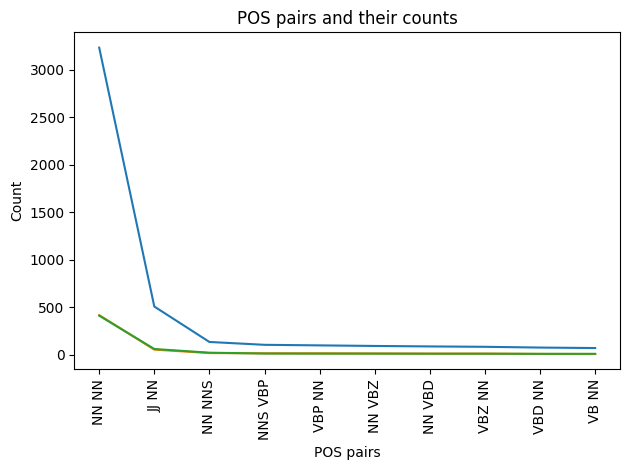

In [167]:
print(data_set4.plot_pos())
print(data_set5.plot_pos())
print(data_set6.plot_pos())

None
None


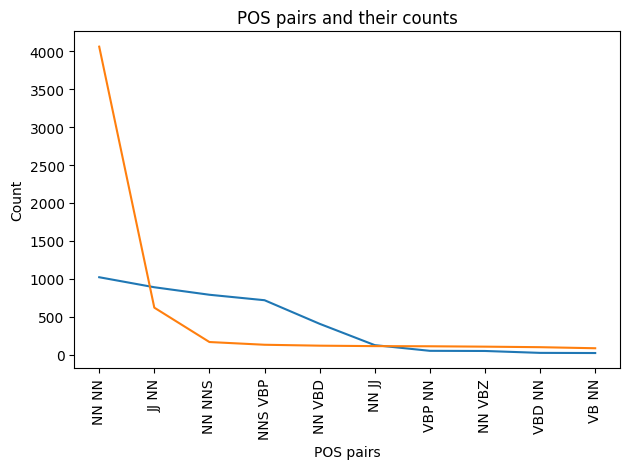

In [168]:
print(data_set_com1.plot_pos())
print(data_set_com2.plot_pos())

In [114]:
print(data_set1.pos_counts)
print(list(data_set1.pos_counts))
print(data_set1.pos_counts.keys())
print(data_set1.pos_counts.values())

{'NN VBZ': 715, 'VBZ NN': 639, 'NN NNS': 801, 'NNS VBP': 319, 'NNS NN': 572, 'VBZ JJR': 4, 'VBZ JJ': 40, 'JJ VBZ': 20, 'VBZ VBP': 10, 'VBZ NNS': 18, 'JJ NNS': 104, 'JJ NN': 10, 'NN NN': 44, 'VBG NNS': 18, 'VBZ RB': 11, 'VB NNS': 2, 'VBZ JJS': 3, 'NN CD': 1, 'CD NN': 1, 'NNS NNS': 3, 'NN JJ': 6, 'NN VBP': 2, 'VBP NN': 7, 'NNS JJ': 13, 'NNS VBD': 16, 'RB VBZ': 8, 'VBZ VBN': 1, 'NNS VBG': 13, 'NNS IN': 3, 'VBZ VB': 5, 'NN DT': 2, 'DT NN': 2, 'RB NNS': 3, 'VBZ RP': 5, 'NNS VBZ': 2, 'JJ JJ': 1, 'NNS RB': 3, 'NNS VB': 5, 'VBD NN': 3, 'VBZ VBG': 7, 'VBD VBG': 1, 'JJR NNS': 3, 'NNS RBR': 1, 'VBZ IN': 1, 'VBN NNS': 3, 'NNS RP': 1, 'VBG VBZ': 1, 'VBZ CC': 1, 'JJS NNS': 1, 'VBZ VBD': 1}
['NN VBZ', 'VBZ NN', 'NN NNS', 'NNS VBP', 'NNS NN', 'VBZ JJR', 'VBZ JJ', 'JJ VBZ', 'VBZ VBP', 'VBZ NNS', 'JJ NNS', 'JJ NN', 'NN NN', 'VBG NNS', 'VBZ RB', 'VB NNS', 'VBZ JJS', 'NN CD', 'CD NN', 'NNS NNS', 'NN JJ', 'NN VBP', 'VBP NN', 'NNS JJ', 'NNS VBD', 'RB VBZ', 'VBZ VBN', 'NNS VBG', 'NNS IN', 'VBZ VB', 'NN DT', 

In [137]:
a=data_set1.pos_counts
temp_result = dict(sorted(a.items(), key=lambda item: item[1], reverse=True))
first_ten_result= {key: temp_result[key] for key in list(temp_result)[:10]}
print(first_ten_result)

{'NN NNS': 801, 'NN VBZ': 715, 'VBZ NN': 639, 'NNS NN': 572, 'NNS VBP': 319, 'JJ NNS': 104, 'NN NN': 44, 'VBZ JJ': 40, 'JJ VBZ': 20, 'VBZ NNS': 18}
